In [1]:
# Initial Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current btc price
btc_response_data = requests.get(btc_url)

# Fetch current eth price
eth_response_data = requests.get(eth_url)

In [6]:
# Compute current value of portfolio
btc_data = btc_response_data.json()
my_btc_value = my_btc * btc_data['data']['1']['quotes']['USD']['price']

eth_data = eth_response_data.json()
my_eth_value = my_eth * eth_data['data']['1027']['quotes']['USD']['price']

# Print current crypto balance 
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41743.20
The current value of your 5.3 ETH is $11790.65


In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="V2"
)

In [9]:
# Format current data as ISO format
start_date = pd.Timestamp("2020-10-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to 'ID' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date
).df

# Preview DataFrame
ticker_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-10 00:00:00-05:00  116.97  117.01  116.9200  117.00  3448438  392.12   
2021-02-11 00:00:00-05:00  117.03  117.03  116.8000  116.87  3375374  391.24   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765  389.85   
2021-02-16 00:00:00-05:00  116.22  116.23  116.0200  116.03  5543350  393.96   
2021-02-17 00:00:00-05:00  116.22  116.29  116.1450  116.28  6038386  390.42   

                                                             
                             high     low   close    volume  
time                                                         
2021-02-10 00:00:00-05:00  392.28  387.50  390.10  53797977  
2021-02-11 00:00:00-05:00  391.69  388.10  390.73  38939025  
2021-02-12 00:00:00-05:00  392.90  389.77  392.69  39697380  
2021-02-16 00:00:00-05:00  394.17  391.53  392.34  43206214  
2021-02-17 00:00:00-05:00  392.66  389.33  392.43  44671866

In [10]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close']['2021-02-10']
spy_close_price = ticker_data['SPY']['close']['2021-02-10']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.0
Current SPY closing price: $390.1


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19505.00
The current value of your 200 AGG shares is $23400.00


In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
df = {'amount' : {
        "crypto" : crypto_value,
        "shares" : shares_value
        }
     }
df_savings = pd.DataFrame(df)

# Display savings DataFrame
display(df_savings)

,amount
crypto,53533.845
shares,42905.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

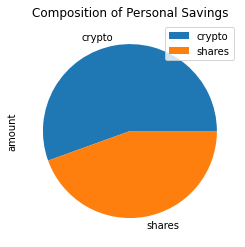

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df['amount']['crypto'] + df['amount']['shares']

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    amount_to_goal = emergency_fund - total_savings
    print(f"You are ${amount_to_goal:.2f} away from your goal. You're almost there. Keep going!")

Congratulations! You have enough money in your emergency fund.


In [15]:
# Set start and end dates of five years back from today
# Sample results may vary from the soluation based on the time frame chosen
start_date = pd.Timestamp('2015-10-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-02', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-10 00:00:00-05:00  116.97  117.01  116.9200  117.00  3448438  392.12   
2021-02-11 00:00:00-05:00  117.03  117.03  116.8000  116.87  3375374  391.24   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765  389.85   
2021-02-16 00:00:00-05:00  116.22  116.23  116.0200  116.03  5543350  393.96   
2021-02-17 00:00:00-05:00  116.22  116.29  116.1450  116.28  6038386  390.42   

                                                             
                             high     low   close    volume  
time                                                         
2021-02-10 00:00:00-05:00  392.28  387.50  390.10  53797977  
2021-02-11 00:00:00-05:00  391.69  388.10  390.73  38939025  
2021-02-12 00:00:00-05:00  392.90  389.77  392.69  39697380  
2021-02-16 00:00:00-05:00  394.17  391.53  392.34  43206214  
2021-02-17 00:00:00-05:00  392.66  389.33  392.43  44671866

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years of cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [18]:
# Print simulation input data 
MC_even_dist.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2021-02-10 00:00:00-05:00  116.97  117.01  116.9200  117.00  3448438   
2021-02-11 00:00:00-05:00  117.03  117.03  116.8000  116.87  3375374   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765   
2021-02-16 00:00:00-05:00  116.22  116.23  116.0200  116.03  5543350   
2021-02-17 00:00:00-05:00  116.22  116.29  116.1450  116.28  6038386   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-02-10 00:00:00-05:00          NaN  392.12  392.28  387.50  390.10   
2021-02-11 00:00:00-05:00    -0.001111  391.24  391.69  388.10  390.73   
2021-02-12 00:00:00-05:00    -0.002481  389.85  392.90  389.77  392.69   
2021-02-16 00:00:00-05:00    -0.004718  393.96  394.17  391.53  392.34   
2021-02-17 00:00:00-05:00     0.002155  390.42  392.66  389.33  392.43   

                                                  
                             volume daily_return  
time                                              
2021-02-10 00:00:00-05:00  53797977          NaN  
2021-02-11 00:00:00-05:00  38939025     0.001615  
2021-02-12 00:00:00-05:00  39697380     0.005016  
2021-02-16 00:00:00-05:00  43206214    -0.000891  
2021-02-17 00:00:00-05:00  44671866     0.000229

In [19]:
# Run a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996820,1.001935,0.996512,0.992582,1.002187,0.999828,0.997582,1.002912,0.995166,1.000575,...,1.006869,1.004848,1.004302,0.998580,0.997727,1.012055,0.996737,0.998041,1.006420,0.992374
2,0.997193,1.008125,1.001853,0.998955,1.007956,1.004450,1.001771,1.000405,0.996246,1.000454,...,1.011020,1.001572,0.998916,0.997286,0.991022,1.009858,0.993090,1.001156,1.008098,1.000891
3,0.997279,1.011079,1.001408,1.006401,1.012280,0.999231,1.011087,0.999921,0.996970,1.006203,...,1.012363,1.010403,0.997612,1.012353,0.995295,1.014588,0.981837,0.998064,1.011119,1.002873
4,1.003421,1.015279,1.008996,1.012043,1.017984,1.006522,1.013040,1.005552,0.994270,1.005723,...,1.005111,1.025199,1.002293,1.021231,0.989809,1.009690,0.980104,1.003732,1.009638,1.005212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,122.641179,161.294583,218.156950,66.715385,93.010349,204.765288,108.540554,60.658212,97.324033,87.874016,...,65.520423,122.969063,100.902367,81.485666,89.674606,117.662852,73.853443,111.754050,126.859985,87.743925
7557,123.230840,161.529777,219.595785,66.585269,93.251173,205.558371,109.365808,60.753606,97.413169,87.975677,...,65.955108,124.919782,102.054425,82.178546,89.798059,117.325671,73.580390,110.623499,127.066108,87.577702
7558,122.416479,160.673589,218.970873,66.813480,93.330838,205.097187,108.995200,60.883502,97.616575,87.778583,...,66.026362,124.687905,102.391697,81.995386,88.822837,117.175274,73.955560,111.203672,127.317651,88.143049
7559,121.875249,160.676957,219.789588,67.019976,93.850427,203.108928,109.402311,60.105890,97.607367,87.648825,...,65.722208,124.315630,101.949067,81.887355,89.060706,116.658565,73.916425,111.293340,126.904384,87.720098


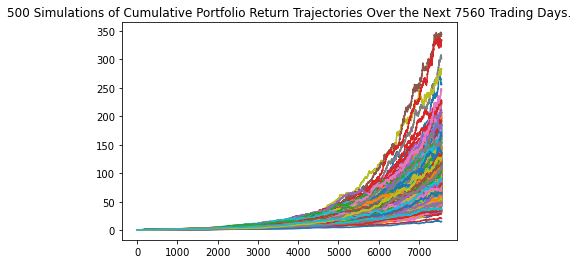

In [20]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

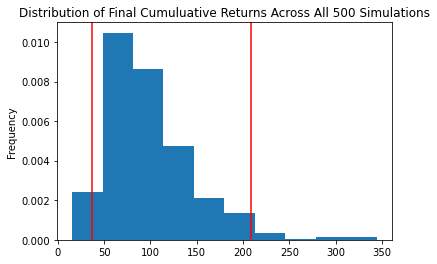

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [22]:
# Fetch summary stats from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary stats
print(even_tbl)

count           500.000000
mean             98.652537
std              46.985971
min              15.491349
25%              65.108993
50%              90.107366
75%             121.411588
max             344.154060
95% CI Lower     36.892245
95% CI Upper    208.680101
Name: 7560, dtype: float64


In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper '95%' confidence intervals to calculate the range of possible outcomes of $20,000 investment
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $737844.91 and $4173602.02


In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper '95%' confidence intervals to calculate the range of possible outcomes of $30,000 investment
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
     f" over the next 30 years will end within the range of"
     f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $1106767.36 and $6260403.03


In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years of cumulative returns
MC_even_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [38]:
# Print simulation input data 
MC_even_dist_five.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2021-02-10 00:00:00-05:00  116.97  117.01  116.9200  117.00  3448438   
2021-02-11 00:00:00-05:00  117.03  117.03  116.8000  116.87  3375374   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765   
2021-02-16 00:00:00-05:00  116.22  116.23  116.0200  116.03  5543350   
2021-02-17 00:00:00-05:00  116.22  116.29  116.1450  116.28  6038386   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-02-10 00:00:00-05:00          NaN  392.12  392.28  387.50  390.10   
2021-02-11 00:00:00-05:00    -0.001111  391.24  391.69  388.10  390.73   
2021-02-12 00:00:00-05:00    -0.002481  389.85  392.90  389.77  392.69   
2021-02-16 00:00:00-05:00    -0.004718  393.96  394.17  391.53  392.34   
2021-02-17 00:00:00-05:00     0.002155  390.42  392.66  389.33  392.43   

                                                  
                             volume daily_return  
time                                              
2021-02-10 00:00:00-05:00  53797977          NaN  
2021-02-11 00:00:00-05:00  38939025     0.001615  
2021-02-12 00:00:00-05:00  39697380     0.005016  
2021-02-16 00:00:00-05:00  43206214    -0.000891  
2021-02-17 00:00:00-05:00  44671866     0.000229

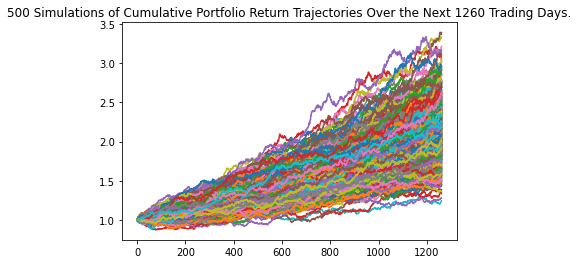

In [40]:
# Plot simulation outcomes
line_plot = MC_even_dist_five.plot_simulation()

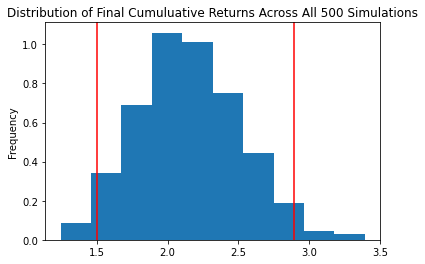

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [42]:
# Fetch summary stats from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary stats
print(even_tbl_five)

count           500.000000
mean              2.153853
std               0.363886
min               1.242488
25%               1.898930
50%               2.130603
75%               2.400939
max               3.393943
95% CI Lower      1.497370
95% CI Upper      2.894099
Name: 1260, dtype: float64


In [56]:
# Set initial investment 
initial_investment_five = 30000
# Use the lower and upper '95%' confidence intervals to calculate the range of the possible outcomes of $30,000 investment
ci_lower_five = round(even_tbl_five[8]*30000,2)
ci_upper_five = round(even_tbl_five[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
     f" over the next 5 years will end within the range of"
     f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within the range of $44921.09 and $86822.98


In [57]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40, .60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2021-02-10 00:00:00-05:00  116.97  117.01  116.9200  117.00  3448438   
2021-02-11 00:00:00-05:00  117.03  117.03  116.8000  116.87  3375374   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765   
2021-02-16 00:00:00-05:00  116.22  116.23  116.0200  116.03  5543350   
2021-02-17 00:00:00-05:00  116.22  116.29  116.1450  116.28  6038386   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2021-02-10 00:00:00-05:00          NaN  392.12  392.28  387.50  390.10   
2021-02-11 00:00:00-05:00    -0.001111  391.24  391.69  388.10  390.73   
2021-02-12 00:00:00-05:00    -0.002481  389.85  392.90  389.77  392.69   
2021-02-16 00:00:00-05:00    -0.004718  393.96  394.17  391.53  392.34   
2021-02-17 00:00:00-05:00     0.002155  390.42  392.66  389.33  392.43   

                                                  
                             volume daily_return  
time                                              
2021-02-10 00:00:00-05:00  53797977          NaN  
2021-02-11 00:00:00-05:00  38939025     0.001615  
2021-02-12 00:00:00-05:00  39697380     0.005016  
2021-02-16 00:00:00-05:00  43206214    -0.000891  
2021-02-17 00:00:00-05:00  44671866     0.000229

In [58]:
# Running a Monte Carlo simulation to forecast 10 years of cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989717,0.997222,0.992140,0.992952,0.996753,0.996245,1.003917,0.997545,0.993487,0.998755,...,1.005279,1.004856,0.999298,1.003462,1.000202,1.004283,0.994684,1.003142,0.998285,1.003059
2,0.994751,1.000076,0.985063,1.000331,0.992748,0.992162,1.002077,1.000787,0.990081,1.000124,...,1.001136,0.999460,0.995486,1.000895,1.002914,1.009206,0.994132,1.000267,0.997147,1.007662
3,0.996009,0.997842,0.982872,0.997427,0.991903,1.000681,0.998724,0.993079,0.991012,1.008339,...,1.002629,1.002080,0.997774,1.002954,0.998341,1.004778,0.995066,0.999963,0.996684,1.010917
4,0.995867,0.997071,0.982317,1.002118,0.991092,0.994182,1.009295,1.000987,0.996924,1.006666,...,1.010188,0.998829,1.002121,1.003994,1.005171,1.010224,0.996717,1.003615,1.000006,1.005477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.800508,5.927857,5.108914,3.215512,4.840688,5.059465,4.529052,4.539757,3.594420,4.020184,...,4.705954,4.144170,4.015882,4.652716,3.326074,3.063271,6.568757,6.334027,3.899039,3.198022
2517,5.766374,5.924915,5.088961,3.220044,4.833693,5.008488,4.548591,4.552175,3.601516,4.021168,...,4.702182,4.131584,4.029073,4.663075,3.333731,3.054331,6.602316,6.367966,3.879478,3.199770
2518,5.733444,5.985663,5.114498,3.204539,4.861214,5.014655,4.540549,4.585659,3.608640,4.023919,...,4.695577,4.143170,4.049130,4.666600,3.316938,3.061679,6.606076,6.374525,3.870757,3.217524
2519,5.735941,5.989844,5.089088,3.189435,4.879504,5.034783,4.536971,4.598939,3.619546,3.987501,...,4.691857,4.096313,4.031453,4.670125,3.302494,3.084701,6.605590,6.432271,3.870545,3.197849


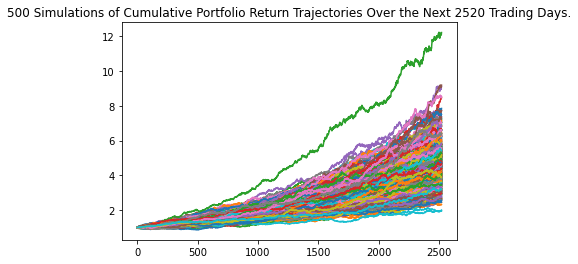

In [59]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

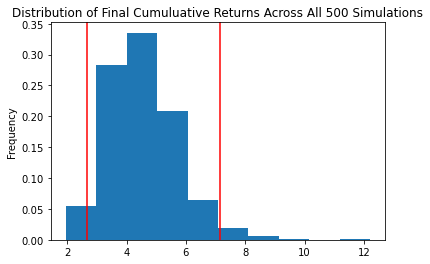

In [60]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [61]:
# Fetch summary stats from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary stats
print(even_tbl_ten)

count           500.000000
mean              4.561887
std               1.195646
min               1.953099
25%               3.712797
50%               4.429021
75%               5.242808
max              12.205908
95% CI Lower      2.680106
95% CI Upper      7.161603
Name: 2520, dtype: float64


In [62]:
# Set initial investment
initial_investment_ten = 30000
# Use the lower and upper '95%' confidence intervals to calculate the range of possible outcomes for $30,000 investment
ci_lower_ten = round(even_tbl_ten[8]*30000,2)
ci_upper_ten = round(even_tbl_ten[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
    f" over the next 10 years will end within the range of"
    f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within the range of $80403.18 and $214848.1
